In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
dataset = pd.read_csv("covid19.csv")

In [3]:
data_name = dataset.columns

In [4]:
dataset[1:].head()

,日付,日本国内累計罹患者数,日本国内新規罹患者数,北海道,青森県,岩手県,宮城県,秋田県,山形県,福島県,...,愛媛県,高知県,福岡県,佐賀県,長崎県,熊本県,大分県,宮崎県,鹿児島県,沖縄県
1,2020/01/16,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/01/17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/01/18,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/01/19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020/01/20,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
convert_time = pd.to_datetime(dataset[1:]["日付"], format='%Y/%m/%d')

In [6]:
convert_time

1     2020-01-16
2     2020-01-17
3     2020-01-18
4     2020-01-19
5     2020-01-20
         ...    
170   2020-07-03
171   2020-07-04
172   2020-07-05
173   2020-07-06
174   2020-07-07
Name: 日付, Length: 174, dtype: datetime64[ns]

In [7]:
kansensya = pd.Series(dataset[1:]["日本国内新規罹患者数"],dtype = "float64")

kansensya = kansensya.fillna(0)

print(kansensya.dtype)
kansensya.index = pd.to_datetime(dataset[1:]["日付"], format='%Y/%m/%d')

float64


In [8]:

print(kansensya.index.dtype)
print(kansensya.dtype)

datetime64[ns]
float64


In [9]:
kansensya

日付
2020-01-16      1.0
2020-01-17      0.0
2020-01-18      0.0
2020-01-19      0.0
2020-01-20      0.0
              ...  
2020-07-03    250.0
2020-07-04    274.0
2020-07-05    208.0
2020-07-06    176.0
2020-07-07    211.0
Name: 日本国内新規罹患者数, Length: 174, dtype: float64

In [10]:
print(kansensya.rolling(window=7).mean())

日付
2020-01-16           NaN
2020-01-17           NaN
2020-01-18           NaN
2020-01-19           NaN
2020-01-20           NaN
                 ...    
2020-07-03    146.285714
2020-07-04    172.285714
2020-07-05    185.857143
2020-07-06    195.285714
2020-07-07    205.714286
Name: 日本国内新規罹患者数, Length: 174, dtype: float64


日付
2020-04-05    281.000000
2020-04-06    302.571429
2020-04-07    320.571429
2020-04-08    357.571429
2020-04-09    400.285714
                 ...    
2020-07-03    146.285714
2020-07-04    172.285714
2020-07-05    185.857143
2020-07-06    195.285714
2020-07-07    205.714286
Name: 日本国内新規罹患者数, Length: 94, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


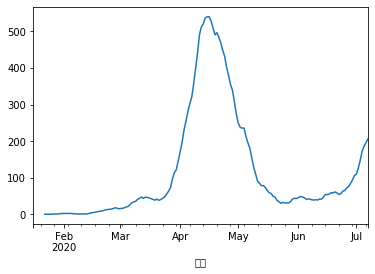

In [11]:
kansensya.rolling(window = 7 ).mean().plot()

move_mean = kansensya.rolling(window = 7).mean()

move_mean[80:]

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


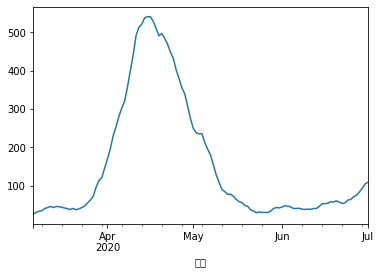

In [12]:
fig = plt.figure()
kansensya.rolling(window =7).mean()[50:-6].plot()
fig.savefig("fig.png")



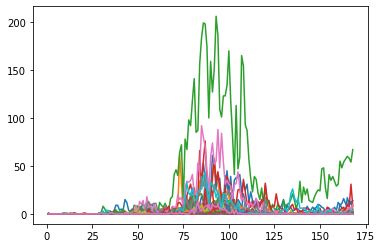

In [13]:
for i in range(len(data_name)-3):
    
    a = pd.Series(dataset[1:][data_name[i+3]],dtype = "float64")
    a = a.fillna(0)
    a[:-6].plot()
    

In [14]:
#kansensya

import statsmodels.api as sm 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


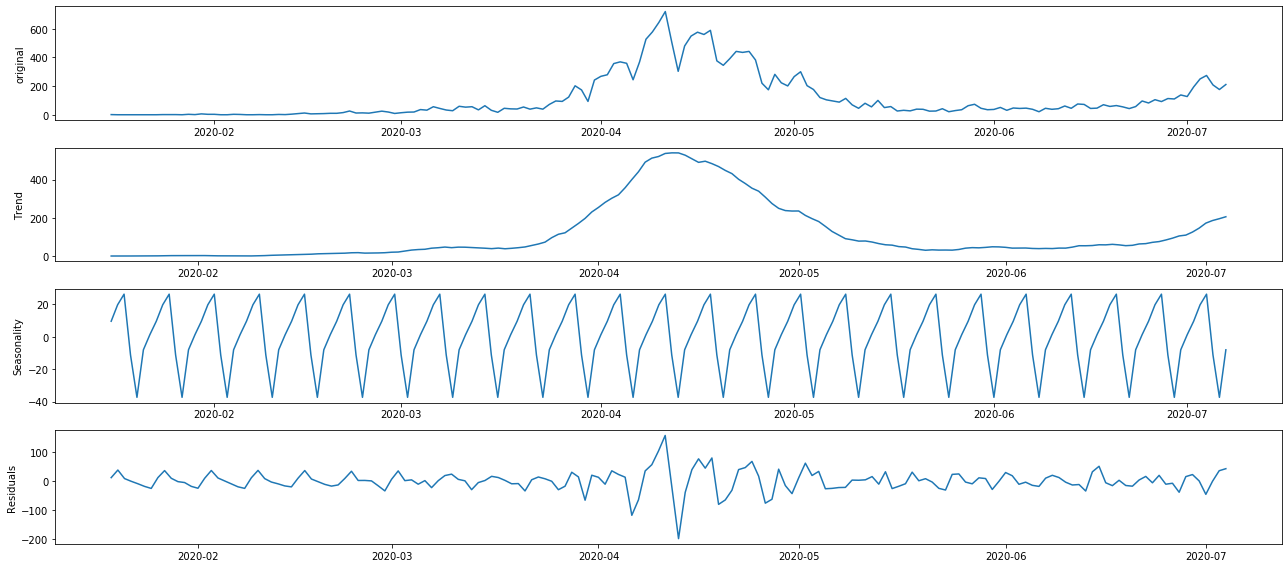

In [15]:
res = sm.tsa.seasonal_decompose(kansensya,freq = 7)

original = kansensya
trend = res.trend
seasonal = res.seasonal
residual = res.resid
plt.figure(figsize = (18,8))

plt.subplot(411)
plt.plot(original)
plt.ylabel("original")


# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

In [16]:
kansensya.groupby(kansensya.index.day).mean()

日付
1     119.166667
2     140.333333
3     143.333333
4     150.833333
5     127.500000
6     104.333333
7     126.166667
8     134.000000
9     153.000000
10    162.000000
11    172.400000
12    141.000000
13     88.200000
14    145.200000
15    142.800000
16    116.833333
17    114.000000
18    123.166667
19     85.166667
20     85.333333
21     89.666667
22     97.333333
23     94.833333
24    111.000000
25     98.833333
26     77.666667
27     74.833333
28    113.666667
29     98.166667
30     96.600000
31     93.333333
Name: 日本国内新規罹患者数, dtype: float64

In [17]:
kansensya.groupby(kansensya.index.month).mean()

日付
1      1.062500
2      7.758621
3     64.290323
4    406.333333
5     79.935484
6     62.200000
7    205.714286
Name: 日本国内新規罹患者数, dtype: float64

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20184 missing from current font.
  font.set_text(s, 0, flags=flags)


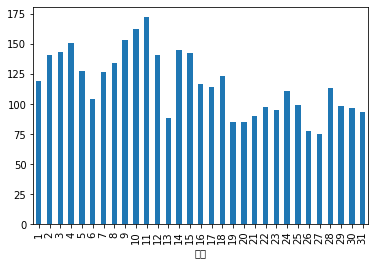

In [18]:
kansensya_day_mean = kansensya.groupby(kansensya.index.day).mean()
kansensya_day_mean.plot(kind="bar")

In [19]:
kansensya_acf = sm.tsa.stattools.acf(kansensya,nlags = 40)

kansensya_acf 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        ,  0.949922  ,  0.89454867,  0.86640573,  0.84126831,
        0.8213065 ,  0.82997102,  0.81962834,  0.75653518,  0.68795491,
        0.64147848,  0.59599473,  0.55450402,  0.53721537,  0.5066656 ,
        0.43348419,  0.37075039,  0.32378854,  0.2716419 ,  0.22843448,
        0.20785547,  0.17778326,  0.12916526,  0.08158654,  0.04006632,
       -0.0011892 , -0.03483808, -0.05318049, -0.07155231, -0.10662977,
       -0.13489055, -0.15723061, -0.18235375, -0.20141048, -0.20874356,
       -0.21894036, -0.23887677, -0.25975839, -0.27750713, -0.28749586,
       -0.29831037])

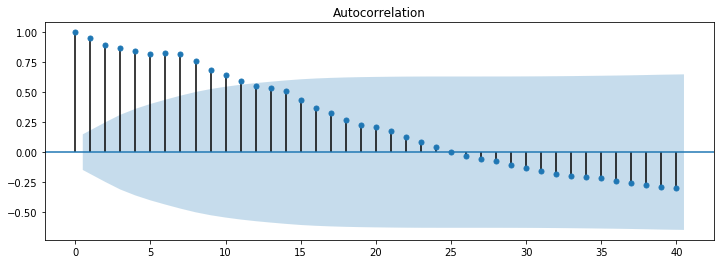

In [20]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(111)
sm.graphics.tsa.plot_acf(kansensya,lags = 40,ax = ax1)
plt.show()

In [21]:
kansensya_diff = kansensya - kansensya.shift()

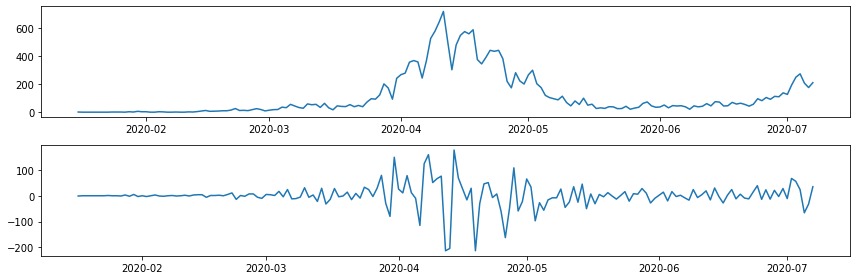

In [22]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(211)
plt.plot(kansensya)

ax2 = fig.add_subplot(212)
plt.plot(kansensya_diff)

plt.tight_layout()

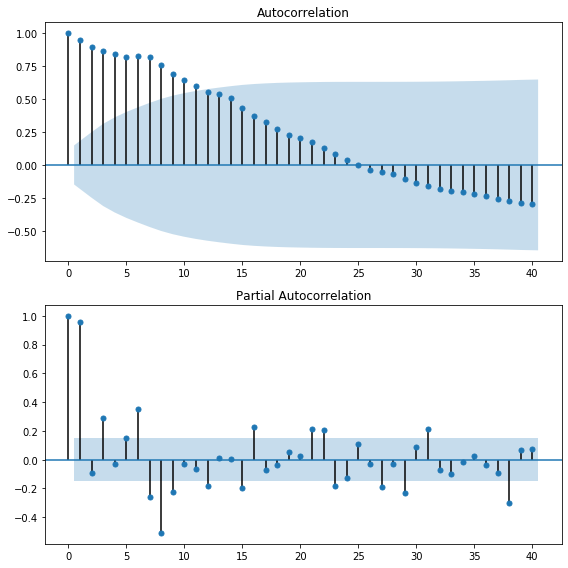

In [23]:
# 階差系列データでコレログラム作成
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(kansensya, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(kansensya, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
# ADF検定（原型列で確認だけ）
res_ctt = sm.tsa.stattools.adfuller(kansensya, regression="ctt") # トレンド項あり（２次）、定数項あり
res_ct = sm.tsa.stattools.adfuller(kansensya, regression="ct") # トレンド項あり（１次）、定数項あり
res_c = sm.tsa.stattools.adfuller(kansensya, regression="c") # トレンド項なし、定数項あり
res_nc = sm.tsa.stattools.adfuller(kansensya, regression="nc") # トレンド項なし、定数項なし
print(res_ctt)
print(res_ct)
print(res_c)
print(res_nc)


(-3.2080293258909767, 0.20612617357592367, 11, 162, {'1%': -4.44410551510892, '5%': -3.869348678103496, '10%': -3.576066757335245}, 1625.4052740541683)
(-2.4969341683704145, 0.32949679286853906, 8, 165, {'1%': -4.014711324540167, '5%': -3.43744048646242, '10%': -3.142869454044578}, 1624.6489410838203)
(-2.4279118927909704, 0.13401293868893915, 8, 165, {'1%': -3.470616369591229, '5%': -2.8792214018977655, '10%': -2.57619681359045}, 1622.9287011740134)
(-1.6406635550099198, 0.09527710645743742, 8, 165, {'1%': -2.5794235261707987, '5%': -1.942744527812561, '10%': -1.6153043444917494}, 1624.4633718139344)


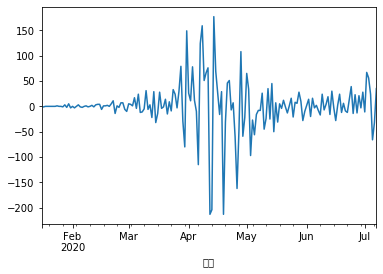

In [26]:
kansensya_diff.plot()

In [27]:
#res_selection = sm.tsa.arma_order_select_ic(kansensya_diff,ic = "aic",trend="nc")
#res_selection

In [28]:
# SRIMAモデル作成その１
sarimax = sm.tsa.SARIMAX(kansensya, 
                        order=(3, 1, 2),
                        seasonal_order=(1, 1, 1, 7),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()


In [29]:
sarimax_resid = sarimax.resid

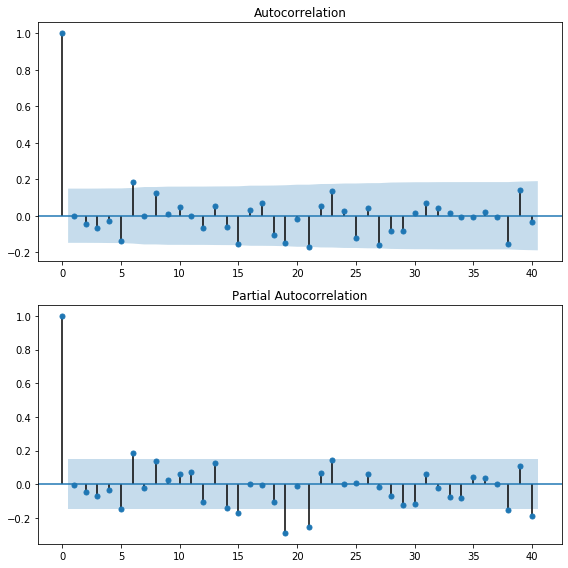

In [30]:
fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

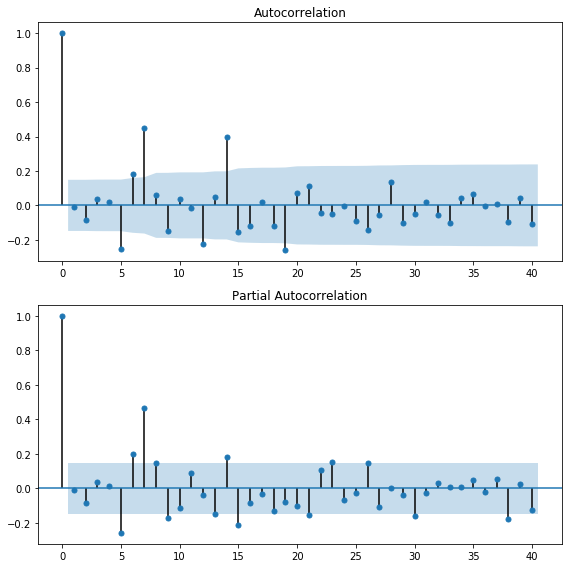

In [31]:
# SRIMAモデル（試しに）季節調整なし
sarimax_noseasonal = sm.tsa.SARIMAX(kansensya, 
                        order=(3, 1, 2),
                        seasonal_order=(0, 0, 0, 0),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_noseasonal_resid = sarimax_noseasonal.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_noseasonal_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_noseasonal_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整


In [32]:
print(sarimax.aic) # 季節調整あり -> 914
print(sarimax_noseasonal.aic) # 季節調整なし -> 1352


1629.1617754548465
1791.5745681017663


In [33]:
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          日本国内新規罹患者数   No. Observations:                  174
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 7)   Log Likelihood                -806.581
Date:                             Thu, 30 Jul 2020   AIC                           1629.162
Time:                                     00:10:46   BIC                           1653.561
Sample:                                 01-16-2020   HQIC                          1639.072
                                      - 07-07-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1444      0.071     16.032      0.000       1.004       1.284
ar.L2         -0.9703      0.069    -14.047      0.000      -1.106      -0.835
ar.L3          0.0146      0.063      0.232      0.816      -0.108       0.137
ma.L1         -1.2096      4.037     -0.300      0.764      -9.121       6.702
ma.L2          0.9998      6.678      0.150      0.881     -12.089      14.088
ar.S.L7       -0.6728      0.144     -4.664      0.000      -0.956      -0.390
ma.S.L7        0.3438      0.178      1.935      0.053      -0.004       0.692
sigma2      1730.4860   1.15e+04      0.150      0.880   -2.08e+04    2.43e+04
===================================================================================
Ljung-Box (Q):                       58.03   Jarque-Bera (JB):               121.08
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               3.42   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

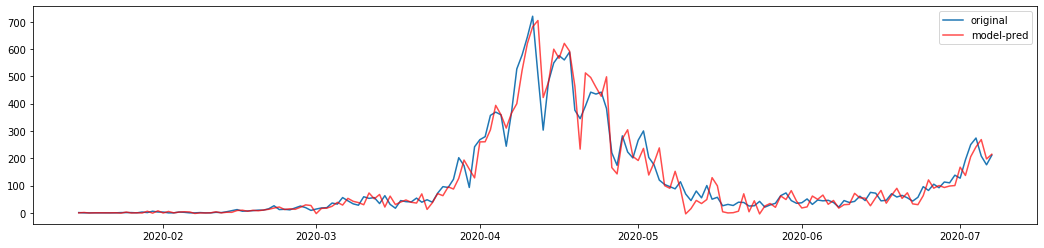

In [34]:
sarimax_pred = sarimax.predict('2020-01-16', '2020-07-07') 
plt.figure(figsize=(18, 4))
plt.plot(kansensya,label = "original")
plt.plot(sarimax_pred, c="r", label = "model-pred",alpha = 0.7)
plt.legend(loc="best")

In [35]:
warnings.filterwarnings('ignore') # 警告非表示（収束：ConvergenceWarning）

# パラメータ範囲
# order(p, d, q)
min_p = 1; max_p = 3 # min_pは1以上を指定しないとエラー
min_d = 0; max_d = 2
min_q = 0; max_q = 3 

# seasonal_order(sp, sd, sq)
min_sp = 0; max_sp = 1
min_sd = 0; max_sd = 1
min_sq = 0; max_sq = 1

test_pattern = (max_p - min_p +1)*(max_q - min_q + 1)*(max_d - min_d + 1)*(max_sp - min_sp + 1)*(max_sq - min_sq + 1)*(max_sd - min_sd + 1)
print("pattern:", test_pattern)

sfq = 7 # seasonal_order周期パラメータ
ts = kansensya # 時系列データ

test_results = pd.DataFrame(index=range(test_pattern), columns=["model_parameters", "aic"])
num = 0
for p in range(min_p, max_p + 1):
    for d in range(min_d, max_d + 1):
        for q in range(min_q, max_q + 1):
            for sp in range(min_sp, max_sp + 1):
                for sd in range(min_sd, max_sd + 1):
                    for sq in range(min_sq, max_sq + 1):
                        sarima = sm.tsa.SARIMAX(
                            ts, order=(p, d, q), 
                            seasonal_order=(sp, sd, sq, sfq), 
                            enforce_stationarity = False, 
                            enforce_invertibility = False
                        ).fit()
                        test_results.iloc[num]["model_parameters"] = "order=(" + str(p) + ","+ str(d) + ","+ str(q) + "), seasonal_order=("+ str(sp) + ","+ str(sd) + "," + str(sq) + ")"
                        test_results.iloc[num]["aic"] = sarima.aic
                        print(num,'/', test_pattern-1, test_results.iloc[num]["model_parameters"],  test_results.iloc[num]["aic"] )
                        num = num + 1

# 結果（最小AiC）
print("best[aic] parameter ********")
print(test_results[test_results.aic == min(test_results.aic)])

pattern: 288
0 / 287 order=(1,0,0), seasonal_order=(0,0,0) 1832.4925033478266
1 / 287 order=(1,0,0), seasonal_order=(0,0,1) 1731.670612352988
2 / 287 order=(1,0,0), seasonal_order=(0,1,0) 1731.003918989768
3 / 287 order=(1,0,0), seasonal_order=(0,1,1) 1648.998944974205
4 / 287 order=(1,0,0), seasonal_order=(1,0,0) 1700.6640368028598
5 / 287 order=(1,0,0), seasonal_order=(1,0,1) 1698.7882469976403
6 / 287 order=(1,0,0), seasonal_order=(1,1,0) 1647.057666039256
7 / 287 order=(1,0,0), seasonal_order=(1,1,1) 1650.9989423182965
8 / 287 order=(1,0,1), seasonal_order=(0,0,0) 1822.367816413897
9 / 287 order=(1,0,1), seasonal_order=(0,0,1) 1723.8228227075424
10 / 287 order=(1,0,1), seasonal_order=(0,1,0) 1720.1455039652938
11 / 287 order=(1,0,1), seasonal_order=(0,1,1) 1641.4253111177018
12 / 287 order=(1,0,1), seasonal_order=(1,0,0) 1700.653191245447
13 / 287 order=(1,0,1), seasonal_order=(1,0,1) 1690.8270344514572
14 / 287 order=(1,0,1), seasonal_order=(1,1,0) 1649.0528281904271
15 / 287 orde

125 / 287 order=(2,0,3), seasonal_order=(1,0,1) 1669.1190922253027
126 / 287 order=(2,0,3), seasonal_order=(1,1,0) 1639.8714542428816
127 / 287 order=(2,0,3), seasonal_order=(1,1,1) 1615.1621053927963
128 / 287 order=(2,1,0), seasonal_order=(0,0,0) 1800.4763029092737
129 / 287 order=(2,1,0), seasonal_order=(0,0,1) 1718.8666788455873
130 / 287 order=(2,1,0), seasonal_order=(0,1,0) 1716.8885193992755
131 / 287 order=(2,1,0), seasonal_order=(0,1,1) 1643.8415098729322
132 / 287 order=(2,1,0), seasonal_order=(1,0,0) 1683.7714552265043
133 / 287 order=(2,1,0), seasonal_order=(1,0,1) 1682.9193633708858
134 / 287 order=(2,1,0), seasonal_order=(1,1,0) 1633.3724615297615
135 / 287 order=(2,1,0), seasonal_order=(1,1,1) 1634.0218976876304
136 / 287 order=(2,1,1), seasonal_order=(0,0,0) 1801.8251931719087
137 / 287 order=(2,1,1), seasonal_order=(0,0,1) 1709.2499926926062
138 / 287 order=(2,1,1), seasonal_order=(0,1,0) 1717.6952640462564
139 / 287 order=(2,1,1), seasonal_order=(0,1,1) 1635.580511331

249 / 287 order=(3,1,3), seasonal_order=(0,0,1) 1685.5245460720812
250 / 287 order=(3,1,3), seasonal_order=(0,1,0) 1672.8787110095204
251 / 287 order=(3,1,3), seasonal_order=(0,1,1) 1611.5303724016198
252 / 287 order=(3,1,3), seasonal_order=(1,0,0) 1678.4776872482662
253 / 287 order=(3,1,3), seasonal_order=(1,0,1) 1665.1367518499128
254 / 287 order=(3,1,3), seasonal_order=(1,1,0) 1626.9786847440018
255 / 287 order=(3,1,3), seasonal_order=(1,1,1) 1618.6697085263345
256 / 287 order=(3,2,0), seasonal_order=(0,0,0) 1839.996740534923
257 / 287 order=(3,2,0), seasonal_order=(0,0,1) 1765.41083660507
258 / 287 order=(3,2,0), seasonal_order=(0,1,0) 1748.5865806362422
259 / 287 order=(3,2,0), seasonal_order=(0,1,1) 1681.7913201059528
260 / 287 order=(3,2,0), seasonal_order=(1,0,0) 1717.1923269855567
261 / 287 order=(3,2,0), seasonal_order=(1,0,1) 1715.0599494293979
262 / 287 order=(3,2,0), seasonal_order=(1,1,0) 1660.3091772081314
263 / 287 order=(3,2,0), seasonal_order=(1,1,1) 1660.039253060655

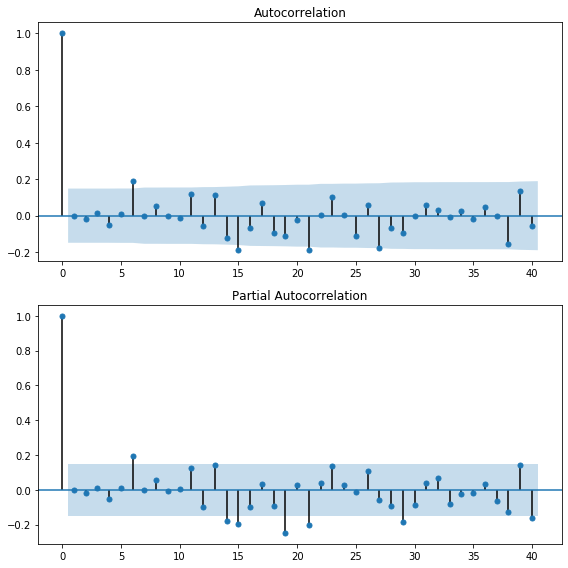

In [36]:
sarimax_optimization = sm.tsa.SARIMAX(kansensya, 
                        order=(2,1,3),
                        seasonal_order=(1, 1, 1, 7),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

sarimax_optimization_resid = sarimax_optimization.resid # 残差成分

fig = plt.figure(figsize=(8, 8))

# 自己相関(ACF)のグラフ
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(sarimax_optimization_resid, lags=40, ax=ax1) #ACF計算とグラフ自動作成

# 偏自己相関(PACF)のグラフ
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(sarimax_optimization_resid, lags=40, ax=ax2) #PACF計算とグラフ自動作成

plt.tight_layout() # グラフ間スキマ調整

In [136]:
kansensya_train = kansensya["2020-01-15":'2020-06-30'] # モデル作成用データ（訓練）
print(kansensya_train.head())
print(kansensya_train.tail())

日付
2020-01-16    1.0
2020-01-17    0.0
2020-01-18    0.0
2020-01-19    0.0
2020-01-20    0.0
Name: 日本国内新規罹患者数, dtype: float64
日付
2020-06-26    105.0
2020-06-27     92.0
2020-06-28    113.0
2020-06-29    110.0
2020-06-30    138.0
Name: 日本国内新規罹患者数, dtype: float64


In [137]:
kansensya_test = kansensya["2020-07-01":"2020-07-07"]
kansensya_test

日付
2020-07-01    127.0
2020-07-02    194.0
2020-07-03    250.0
2020-07-04    274.0
2020-07-05    208.0
2020-07-06    176.0
2020-07-07    211.0
Name: 日本国内新規罹患者数, dtype: float64

In [138]:
sarimax_train = sm.tsa.SARIMAX(kansensya_train, 
                        order=(2, 2, 4),
                        seasonal_order=(1, 1, 1, 7),
                        enforce_stationarity = False,
                        enforce_invertibility = False
                        ).fit()

In [139]:
sarimax_train_pred = sarimax_train.predict("2020-07-01","2020-07-07")
num = sarimax_train_pred._get_numeric_data()
num[num<0] = 0.0
sarimax_train_pred.values



array([143.85047444, 163.01615359, 153.40945564, 165.28596521,
       164.43507682, 163.03316579, 194.35002763])

In [140]:
print([ int(i) for i in sarimax_train_pred])

[143, 163, 153, 165, 164, 163, 194]


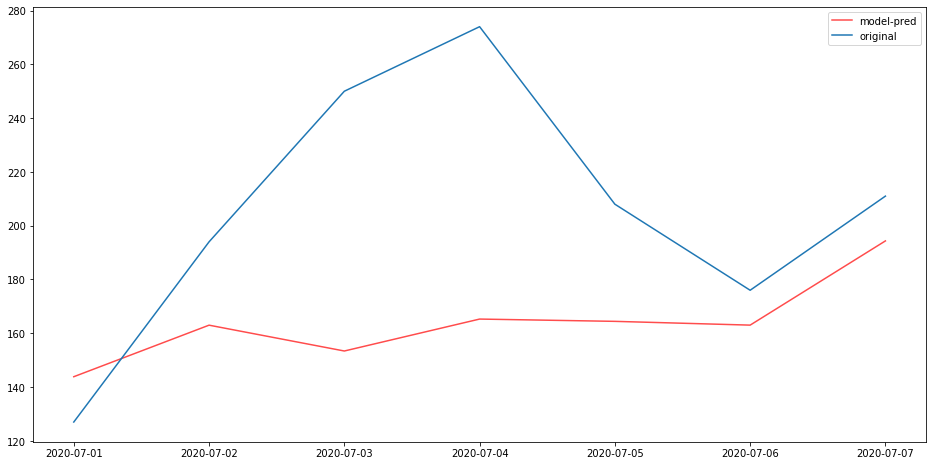

In [141]:
plt.figure(figsize=(16, 8))
plt.plot(sarimax_train_pred, c="r", label="model-pred", alpha=0.7)
plt.plot(kansensya["2020-07-01":"2020-07-07"], label="original")

plt.legend(loc='best')

In [43]:
y_true,y_pred = kansensya_test,sarimax_train_pred

In [44]:
#平均絶対値誤差
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true,y_pred)


31.001330400999215

In [45]:
#平均二乗誤差
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)


1175.8639008017235

In [46]:
#二乗平均平方誤差
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true, y_pred))

34.29087197493997

In [47]:
#決定係数　１が最適
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

-3.2062586610661743

In [48]:
r2_score([89, 79, 99, 88, 111, 110, 132],[50, 73, 67, 68, 67, 62, 60])

-5.384926470588236

In [49]:
# 決定係数　1 ~ 9order=(2,1,3), seasonal_order=(1,1,1) 1280.444　=> -3.33
#決定係数　1 ~ 9order=(2,1,3), seasonal_order=(0,1,1)  1275.96　=> −0.76
#決定係数　3 ~ 9order=(2,1,3), seasonal_order=(0,1,1)  1275.96　=> −5.79
# order = (3,1,3) , seasonal_order = (0,1,1) =>-0.96
#order = (2,2,4) ,seasonal_order = (0,1,1) => -0.59
#order = (2,2,4) ,seasonal_order = (1,1,1) => -0.88

In [51]:
#データ読み込み
dataset2 = pd.read_csv("pop.csv")

In [52]:
data_name2 = dataset.columns

In [53]:
dataset2.head()

,日付,感染拡大以前との比較,前日との比較,宣言前（７日)と比較,新規感染者数
0,4月18日,-80.2,-33.1,-68.3,589.0
1,4月19日,-79.9,1.3,-67.9,376.0
2,4月20日,-69.2,40.9,-54.8,345.0
3,4月21日,-69.7,-1.4,-55.4,391.0
4,4月22日,-69.3,1.1,-55.0,442.0


In [54]:
pd.to_datetime("2020"+"06",format="%Y%m")

Timestamp('2020-06-01 00:00:00')

In [55]:
convert_time = pd.to_datetime("2020年"+dataset2["日付"], format='%Y年%m月%d日')

In [56]:
convert_time.tail(5)

76   2020-07-03
77   2020-07-04
78   2020-07-05
79   2020-07-06
80   2020-07-07
Name: 日付, dtype: datetime64[ns]

In [57]:
#kansensya.rolling(window = 7 ).mean().plot()
move_mean = kansensya.copy()

move_mean = move_mean.rolling(window = 7).mean()
move_mean.name  = "mean"
move_mean[80:]



日付
2020-04-05    281.000000
2020-04-06    302.571429
2020-04-07    320.571429
2020-04-08    357.571429
2020-04-09    400.285714
                 ...    
2020-07-03    146.285714
2020-07-04    172.285714
2020-07-05    185.857143
2020-07-06    195.285714
2020-07-07    205.714286
Name: mean, Length: 94, dtype: float64

In [58]:
import random

In [59]:
move_mean.fillna(0)

日付
2020-01-16      0.000000
2020-01-17      0.000000
2020-01-18      0.000000
2020-01-19      0.000000
2020-01-20      0.000000
                 ...    
2020-07-03    146.285714
2020-07-04    172.285714
2020-07-05    185.857143
2020-07-06    195.285714
2020-07-07    205.714286
Name: mean, Length: 174, dtype: float64

In [60]:
pop = pd.Series(dataset2["感染拡大以前との比較"],dtype = "float64")


pop2 = pd.Series(dataset2["前日との比較"],dtype = "float64").fillna(0)

pop3 = pd.Series(dataset2["宣言前（７日)と比較"],dtype = "float64").fillna(0)

In [61]:
pop.index  = pd.to_datetime("2020年"+dataset2["日付"], format='%Y年%m月%d日')
pop2.index = pd.to_datetime("2020年"+dataset2["日付"], format='%Y年%m月%d日')
pop3.index = pd.to_datetime("2020年"+dataset2["日付"], format='%Y年%m月%d日')



In [62]:
pop.tail(5)

日付
2020-07-03   -38.7
2020-07-04   -47.7
2020-07-05   -55.8
2020-07-06   -43.1
2020-07-07   -48.1
Name: 感染拡大以前との比較, dtype: float64

In [63]:
#del s_v
s_v = pd.concat([move_mean[90:],pop,pop2,pop3,kansensya[90:]],axis = 1)
s_v["感染拡大以前との比較"] = s_v["感染拡大以前との比較"].shift(5)
s_v["感染拡大以前との比較"] = s_v["感染拡大以前との比較"].fillna(-50)
s_v["前日との比較"] = s_v["前日との比較"].shift(5)
s_v["前日との比較"] = s_v["前日との比較"].fillna(-30)
s_v["宣言前（７日)と比較"] = s_v["宣言前（７日)と比較"].shift(5)
s_v["宣言前（７日)と比較"] = s_v["宣言前（７日)と比較"].fillna(-30)
print(pop.mean())
print(pop2.mean())

-57.48518518518519
-1.7987654320987654


In [64]:
s_v.tail(17)
#日本国内新規罹患者数(左)は移動平均化したものである
#右のものは生データ
#5日は潜伏期間と考える
#新規感染者数　＝ a *  (移動平均感染者数７日間^ b) + (感染拡大以前との比較５日前^c) + (前日との比較５日前^d)
#最小二乗法でa,b,c,d の最適なパラメータを求める？

,mean,感染拡大以前との比較,前日との比較,宣言前（７日)と比較,日本国内新規罹患者数
日付,,,,,
2020-06-21,58.428571,-42.8,-7.9,-6.5,55.0
2020-06-22,54.285714,-42.5,-8.2,-5.9,43.0
2020-06-23,56.142857,-44.7,-12.7,-9.5,57.0
2020-06-24,63.285714,-43.5,-7.6,-7.5,96.0
2020-06-25,65.000000,-38.5,-5.9,-2.4,82.0
2020-06-26,71.714286,-49.1,-56.1,-19.2,105.0
2020-06-27,75.714286,-40.9,11.4,-3.3,92.0
2020-06-28,84.000000,-38.7,-3.3,0.3,113.0
2020-06-29,93.571429,-42.0,-15.8,-5.2,110.0


In [65]:
y = np.array(s_v["日本国内新規罹患者数"][8:-7])

x = np.array(s_v[["mean","感染拡大以前との比較","前日との比較"]][8:-7])
x_2 = np.array(s_v[["mean","感染拡大以前との比較"]][8:-7] )#試しに
x_3 = np.array(s_v[["mean","感染拡大以前との比較","前日との比較","宣言前（７日)と比較"]][8:-7] )
x_4 = np.array(s_v[["感染拡大以前との比較","前日との比較","宣言前（７日)と比較"]][8:-7] )

x_sample_test = np.array(s_v[["mean","感染拡大以前との比較","前日との比較"]][-7:])
x_sample_test_2 = np.array(s_v[["mean","感染拡大以前との比較"]][-7:])
x_sample_test_3  = np.array(s_v[["mean","感染拡大以前との比較","前日との比較","宣言前（７日)と比較"]][-7:] )
x_sample_test_4 = np.array(s_v[["感染拡大以前との比較","前日との比較","宣言前（７日)と比較"]][-7:] )
y_sample = np.array(s_v["日本国内新規罹患者数"][-7:])

In [66]:
y_sample

array([127., 194., 250., 274., 208., 176., 211.])

In [67]:
x_sample_test_3

array([[109.57142857, -47.8       ,  -8.1       ,   6.1       ],
       [125.57142857, -35.5       , -12.4       ,   2.3       ],
       [146.28571429, -44.9       , -22.2       , -12.6       ],
       [172.28571429, -41.6       ,   2.3       ,  -4.5       ],
       [185.85714286, -45.        , -13.7       , -10.1       ],
       [195.28571429, -39.8       ,  -5.1       ,  -1.6       ],
       [205.71428571, -39.2       , -10.7       ,  -0.5       ]])

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y, test_size=0.2, random_state=0)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3, y, test_size=0.2, random_state=0)
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x_4, y, test_size=0.2, random_state=0)

In [69]:
x_test


array([[ 65.        , -38.5       ,  -5.9       ],
       [ 30.85714286,  62.9       ,   4.        ],
       [ 58.57142857, -51.9       , -14.5       ],
       [ 84.        , -38.7       ,  -3.3       ],
       [ 39.14285714, -48.2       , -17.7       ],
       [ 41.42857143, -58.1       , -11.        ],
       [274.85714286, -78.9       , -27.5       ]])

In [70]:
x_sample = np.array([[100,-40,0],[100,-0,-0]])

In [71]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

model_2 = LinearRegression()
model_2.fit(x_train_2,y_train_2)

model_3 = LinearRegression()
model_3.fit(x_train_3,y_train_3)

model_4 = LinearRegression()
model_4.fit(x_train_4,y_train_4)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
y_pred = model.predict(x_sample)
y_pred

array([100.79644235, 124.24599003])

In [73]:

y_pred_2 = model_2.predict(x_sample_test_2)
print(y_pred_2)

y_pred_3 = model_3.predict(x_sample_test_3)
print(y_pred_3)

y_pred_4 = model_4.predict(x_sample_test_4)
#print(y_pred_4)
print(y_sample)


[104.40920244 125.14415812 137.21532985 160.58539276 170.27600401
 181.10264296 190.3173753 ]
[102.80926015 122.77759564 135.17090854 158.75084674 168.33667823
 179.01520529 188.08851983]
[146.30048249 111.95955283 126.98848078 158.31640604 166.69260234
 176.78608933 185.09801008]
[127. 194. 250. 274. 208. 176. 211.]


In [74]:
for i in range(len(y_pred)):
    print(int(y_pred[i]),int(y_pred_2[i]),int(y_pred_3[i]),int(y_sample[i]))

104 102 146 127
125 122 111 194
137 135 126 250
160 158 158 274
170 168 166 208
181 179 176 176
190 188 185 211


In [75]:
a = []
for i in range(len(y_pred)):
    a.append((sarimax_train_pred[i]+y_pred[i])/2)


In [76]:
y_pred_3

array([146.30048249, 111.95955283, 126.98848078, 158.31640604,
       166.69260234, 176.78608933, 185.09801008])

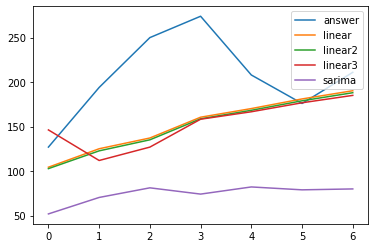

In [77]:

plt.plot(y_sample,label ="answer")
plt.plot(y_pred,label = "linear")
plt.plot(y_pred_2,label = "linear2")
plt.plot(y_pred_3,label = "linear3")
#plt.plot(y_pred_4,label = "linear4")
plt.plot(sarimax_train_pred.values,label = "sarima")
#plt.plot(a ,label = "mean")
plt.legend()


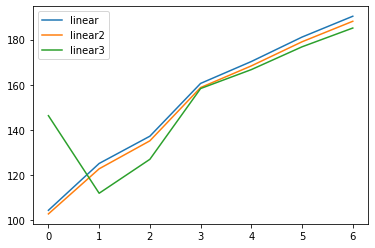

In [78]:
plt.plot(y_pred,label = "linear")
plt.plot(y_pred_2,label = "linear2")
plt.plot(y_pred_3,label = "linear3")
#plt.plot(y_pred_4, label = "linear4")
plt.legend()

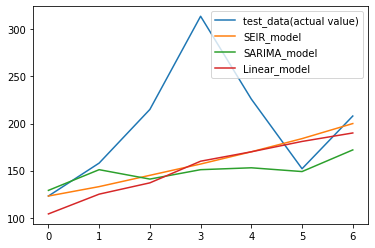

In [28]:
import matplotlib.dates as mdates

x = pd.date_range('2018-08-07 00:00:00', periods=7, freq='d')
a = np.array([123,158,215,314,226,152,208])
b = np.array([123,133,145, 157, 170, 184, 200] )
c = np.array([129, 151, 141, 151, 153, 149, 172])
d =  np.array([104, 125, 137, 160, 170, 181, 190]  )



plt.plot(a,label = "test_data(actual value)")
plt.plot(b,label = "SEIR_model")
plt.plot(c,label = "SARIMA_model")
plt.plot(c*0.0+d*1.0,label = "Linear_model")
plt.legend()

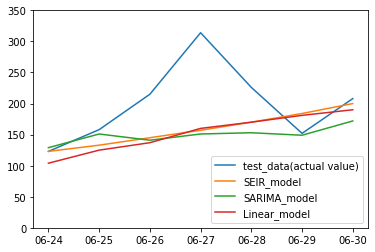

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# 横軸：日付 periods分の日付を用意します。
x = pd.date_range('2020-06-24 00:00:00', periods=7, freq='d')

# 縦軸：数値

a = np.array([89, 79, 99, 88, 111, 110, 132]
b = np.array([89, 93, 97, 101, 105, 109, 114]  )
c = np.array([129, 151, 141, 151, 153, 149, 172])
d =  np.array([104, 125, 137, 160, 170, 181, 190]  )

plt.ylim(100,350)
ax.plot(x,a ,label = "test_data(actual value)")
ax.plot(x,b,label = "SEIR_model")
ax.plot(x,c,label = "SARIMA_model")
ax.plot(x,d,label = "Linear_model")




# 日付ラベルフォーマットを修正
dayｓ = mdates.DayLocator() 
daysFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(daysFmt)


# グラフの表示
plt.legend()
plt.show()

In [79]:
"""
y_pred = model.predict(x_test)
y_pred_2 = model_2.predict(x_test_2)
y_pred_3 = model_3.predict(x_test_3)
y_pred_4 = model_4.predict(x_test_4)
"""

'\ny_pred = model.predict(x_test)\ny_pred_2 = model_2.predict(x_test_2)\ny_pred_3 = model_3.predict(x_test_3)\ny_pred_4 = model_4.predict(x_test_4)\n'

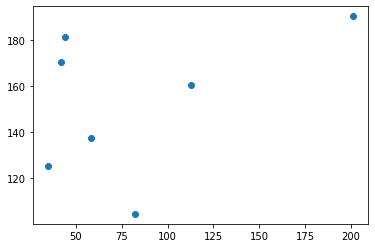

In [80]:
plt.scatter(y_test,y_pred)


In [81]:
y_pred_3 = [ int(i) for i in y_pred_3]
y_pred_2 = [int(i) for i in y_pred_2]
y_pred = [int(i) for i in y_pred]
from sklearn.metrics import r2_score
print(r2_score(y_sample, y_pred_3))
print(r2_score(y_sample,y_pred_2))
print(r2_score([123,158,215,314,226,152,208],y_pred))


-1.7766748357600344
-1.4959943983359762
-0.48403005545947875


In [82]:
print(y_sample)
#print(y_test)

print(y_pred_3)
print(y_pred_2)
print(y_pred)

[127. 194. 250. 274. 208. 176. 211.]
[146, 111, 126, 158, 166, 176, 185]
[102, 122, 135, 158, 168, 179, 188]
[104, 125, 137, 160, 170, 181, 190]


In [83]:
#7/1 ~ 7/7
print(r2_score([123,158,215,314,226,152,208],[129, 151, 141, 151, 153, 149, 172]))

-0.6181525433836246


In [84]:
#-6/24~0630
print(r2_score([89, 79, 99, 88, 111, 110, 132],[56, 58, 57, 68, 74, 80, 91]))

-2.934411764705883


In [85]:
#6/24~6/30
print(r2_score([89, 79, 99, 88, 111, 110, 132],[64, 68, 65, 78, 85, 91, 103]))

-0.997058823529412


In [86]:
print(r2_score([89, 79, 99, 88, 111, 110, 132],[51, 70, 81, 74, 82, 78, 80]))

-2.4042647058823534
